### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [4]:
df=pd.read_csv("retail_sales_dataset.csv")

In [5]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


### Descriptive Statistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
sale=df

In [9]:
retail=df

In [10]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### Data Preprocessing

In [11]:
df=df.astype({'Date':"string"})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   string
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(3), string(1)
memory usage: 70.4+ KB


In [13]:
date=df.iloc[:,1].values

In [14]:
date

<StringArray>
['2023-11-24', '2023-02-27', '2023-01-13', '2023-05-21', '2023-05-06',
 '2023-04-25', '2023-03-13', '2023-02-22', '2023-12-13', '2023-10-07',
 ...
 '2023-12-26', '2023-08-21', '2023-02-06', '2023-12-18', '2023-04-30',
 '2023-05-16', '2023-11-17', '2023-10-29', '2023-12-05', '2023-04-12']
Length: 1000, dtype: string

In [15]:
def time_series(x):
    if(x[0:4]=='2023'):
        return x[5:7]
    return np.nan
df['Date']=df['Date'].apply(time_series)

In [16]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11,CUST001,Male,34,Beauty,3,50,150
1,2,02,CUST002,Female,26,Clothing,2,500,1000
2,3,01,CUST003,Male,50,Electronics,1,30,30
3,4,05,CUST004,Male,37,Clothing,1,500,500
4,5,05,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,05,CUST996,Male,62,Clothing,1,50,50
996,997,11,CUST997,Male,52,Beauty,3,30,90
997,998,10,CUST998,Female,23,Beauty,4,25,100
998,999,12,CUST999,Female,36,Electronics,3,50,150


In [17]:
dgp=df.groupby(['Date'])['Total Amount'].sum()

In [18]:
dgp

Date
01    35450
02    44060
03    28990
04    33870
05    53150
06    36715
07    35465
08    36960
09    23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64

### Time Series Analysis

Text(0, 0.5, 'Total amount of Transaction per month')

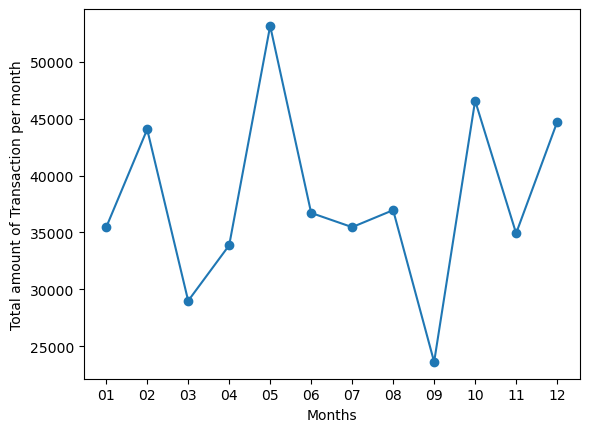

In [19]:
plt.plot(dgp,marker="o")
plt.xlabel("Months")
plt.ylabel("Total amount of Transaction per month")
#Monthly sale in 2023 in different months

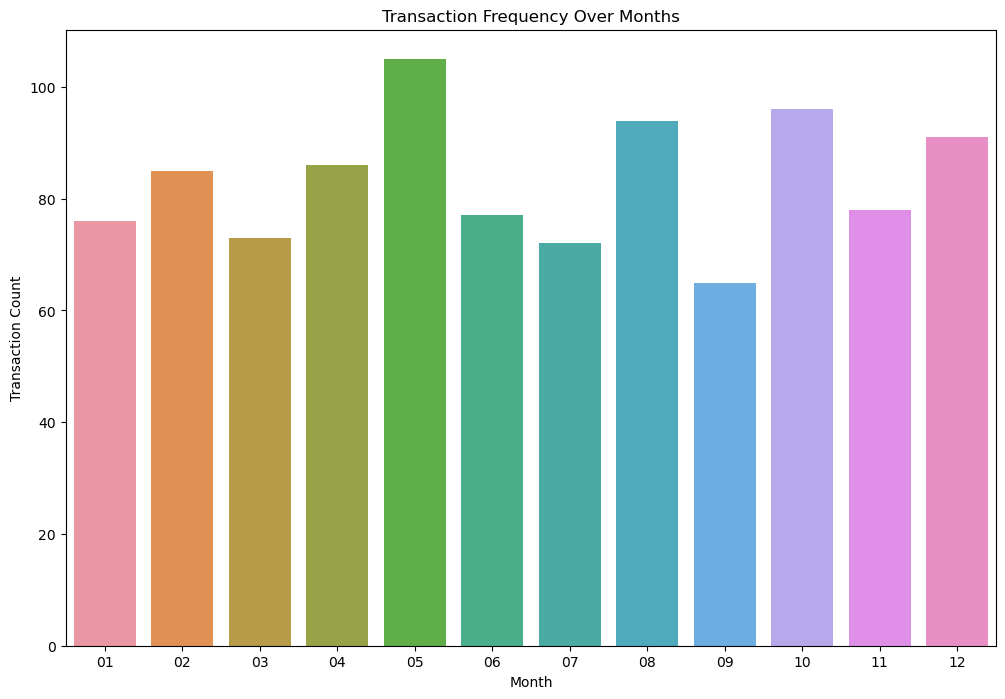

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(x=transaction.index, y=transaction.values)
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

In [20]:
sale.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [21]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [22]:
sale=sale.astype({"Date":"string","Product Category":"string"})

In [23]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   string
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   string
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(2), string(2)
memory usage: 70.4+ KB


In [24]:
sale["Product Category"].nunique()

3

In [25]:
sale["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: Int64

In [26]:
sgp=sale.groupby(["Product Category"])["Total Amount"].sum()

In [27]:
type(sgp)

pandas.core.series.Series

([<matplotlib.patches.Wedge at 0x227653b8990>,
 [Text(0.6047166402794314, 0.9188676645573925, 'Clothing'),
  Text(-1.294472395208471, 0.11975482471802319, 'Electronics'),
  Text(0.5645455902015138, -1.058909002976188, 'Beauty')],
 [Text(0.3298454401524171, 0.5012005443040323, '31.5%'),
  Text(-0.7965983970513667, 0.07369527674955273, '34.1%'),
  Text(0.32931826095088307, -0.6176969184027763, '34.4%')])

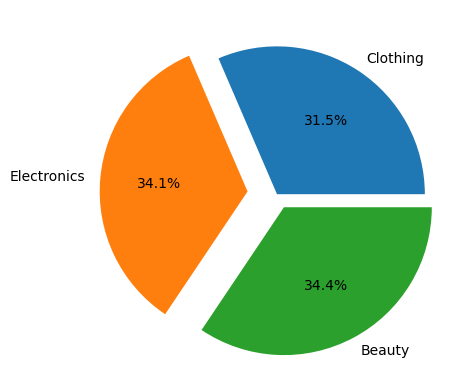

In [45]:
plt.pie(sgp,labels=["Clothing","Electronics","Beauty"],explode=[0,0.2,0.1],autopct='%1.1f%%')

In [29]:
def time_series(x):
    if(x[0:4]=='2023'):
        return x[5:]
    return np.nan
sale['Date']=sale['Date'].apply(time_series)

In [30]:
sale.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11-24,CUST001,Male,34,Beauty,3,50,150
1,2,02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,01-13,CUST003,Male,50,Electronics,1,30,30
3,4,05-21,CUST004,Male,37,Clothing,1,500,500
4,5,05-06,CUST005,Male,30,Beauty,2,50,100


In [31]:
sale.shape

(1000, 9)

In [32]:
sale.dropna(axis=0,inplace=True)

In [33]:
sale.shape

(998, 9)

Text(0.5, 1.0, 'Total Amount of sales with respect to Product categories')

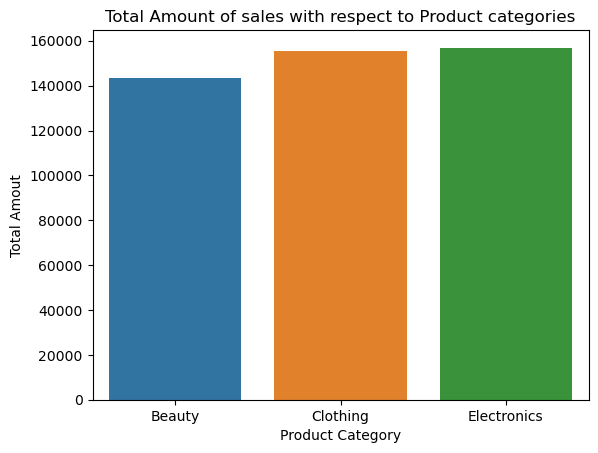

In [53]:
sns.barplot(x=sgp.index,y=sgp.values)
plt.ylabel("Total Amout")
plt.title("Total Amount of sales with respect to Product categories")

In [35]:
sgp

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

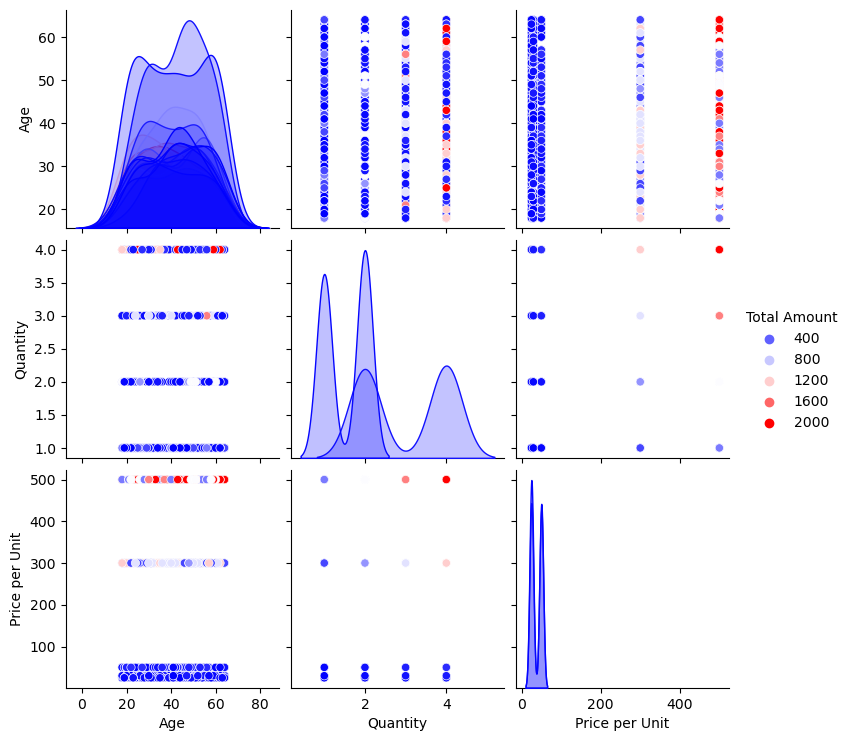

In [36]:
sns.pairplot(data=retail.drop('Transaction ID',axis=1),hue="Total Amount",palette='bwr')

In [37]:
transaction=df.groupby(['Date'])['Transaction ID'].count()

In [38]:
transaction

Date
01     76
02     85
03     73
04     86
05    105
06     77
07     72
08     94
09     65
10     96
11     78
12     91
Name: Transaction ID, dtype: int64

In [38]:
gen_grp=dgp=df.groupby(['Gender'])['Total Amount'].sum()

Text(0.5, 1.0, 'Sales by Gender')

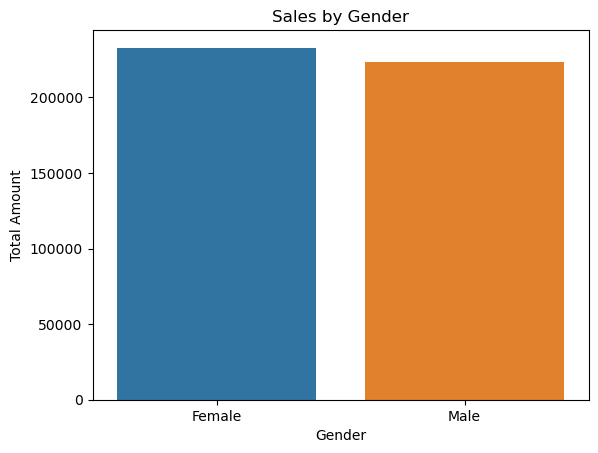

In [49]:
sns.barplot(x=gen_grp.index,y=gen_grp.values)
plt.ylabel("Total Amount")
plt.title("Sales by Gender")

In [40]:
gen_grp_1=dgp=df.groupby(['Product Category'])['Quantity'].sum()

Text(0.5, 1.0, 'Product Category vs Quantity of products')

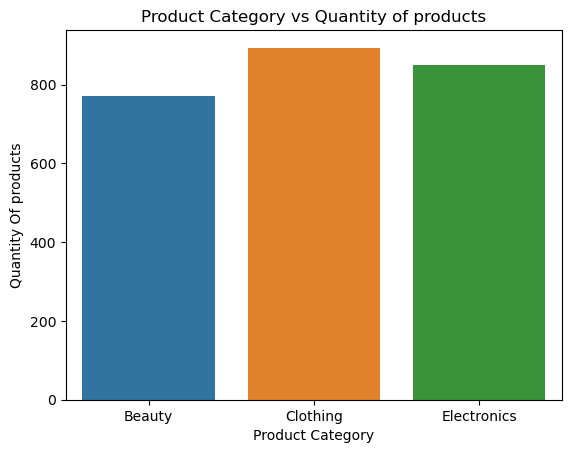

In [51]:
sns.barplot(x=gen_grp_1.index,y=gen_grp_1.values)
plt.ylabel("Quantity Of products")
plt.title("Product Category vs Quantity of products")

<Figure size 1000x600 with 0 Axes>

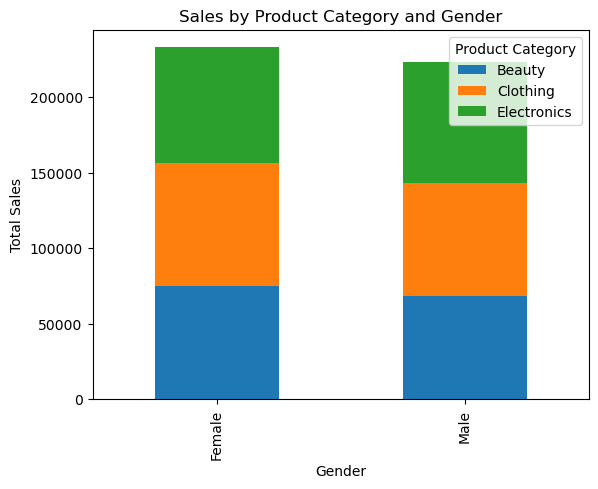

In [47]:
gender_category_sales = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()
plt.figure(figsize=(10, 6))
gender_category_sales.plot(kind='bar', stacked=True)
plt.title('Sales by Product Category and Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
## Electronics products contributed to the mnaximum sales and Most quantity of clothing was sold....